In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import eval_legendre

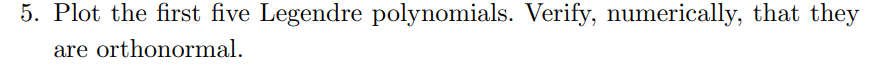

In [35]:
xs = np.linspace(-1, 1, 100000)
dx = xs[1] - xs[0]

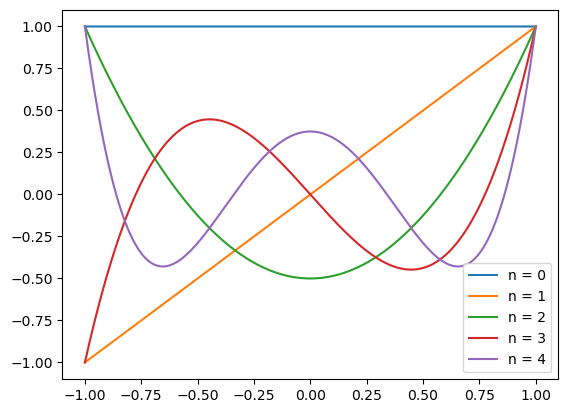

In [36]:
for i in range(5):
    plt.plot(xs, eval_legendre(i, xs), label = 'n = ' + str(i))
    
plt.legend()
plt.show()


In [37]:
ns = np.array([0,1,2,3,4,5]).reshape(1, 6)

In [38]:
mydict = {}
for i in range(5):
    mydict[i] = np.sqrt((2 * i + 1) / 2) * eval_legendre(i, xs)

In [39]:
from itertools import combinations

In [46]:
for i in mydict:
    print("<" + str(i) + "," + str(i) + "> = ", round(dx * mydict[i] @ mydict[i], 3))

<0,0> =  1.0
<1,1> =  1.0
<2,2> =  1.0
<3,3> =  1.0
<4,4> =  1.0


In [44]:
for i, j in combinations(mydict, 2):
    print("<" + str(i) + "," + str(j) + "> = ", round(dx * mydict[i] @ mydict[j], 3))

<0,1> =  0.0
<0,2> =  0.0
<0,3> =  0.0
<0,4> =  0.0
<1,2> =  -0.0
<1,3> =  0.0
<1,4> =  -0.0
<2,3> =  -0.0
<2,4> =  0.0
<3,4> =  -0.0


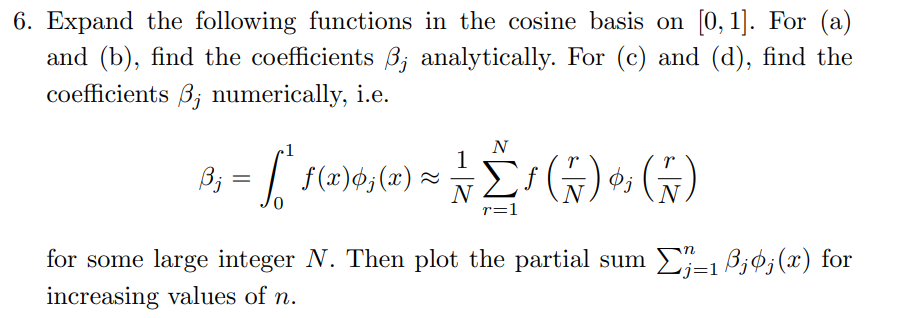
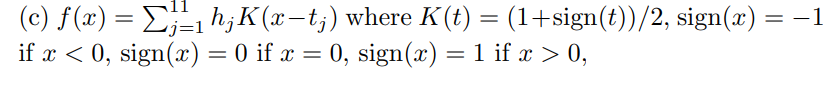
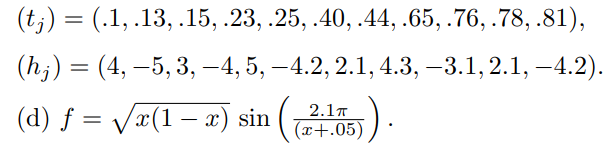

In [117]:
def c(x):

    def K(t):
        return (1 + np.sign(t))/2
    
    hj = np.array([4, -5, 3, -4, 5, -4.2, 2.1,4.3, -3.1, 2.1, -4.2]).reshape(1, -1)
    tj = np.array([0.1, 0.13, 0.15, 0.23, 0.25, 0.4, 0.44, 0.65, 0.76, 0.78, 0.81]).reshape(1, -1)

    x = np.array(x).reshape(-1, 1)

    return np.sum(hj * K(x - tj), axis=1)

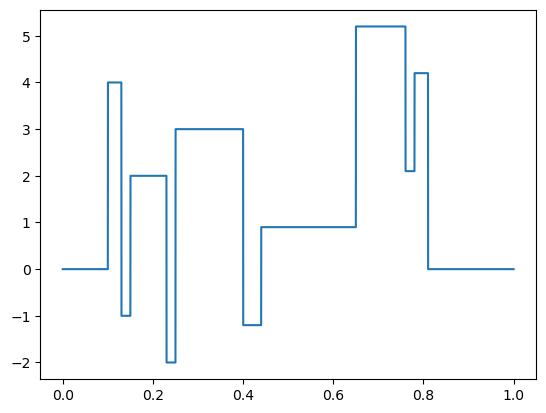

In [118]:
xs = np.linspace(0, 1, 10000)
dx = xs[1] - xs[0]
cs = c(xs)
plt.plot(xs, cs)
plt.show()

In [168]:
J = 256

betadict = {}

betadict[0] = np.ones(xs.shape) @ cs * dx

for i in range(1, J+1):
    betadict[i] = np.sqrt(2) * np.cos(i * np.pi * xs) @ cs * dx




In [169]:
termarrays = np.array(list(betadict.values())).reshape(1, -1) * np.sqrt(2) * np.cos(np.array(list(betadict)).reshape(1, -1) * np.pi * xs.reshape(-1, 1))
termarrays[:, 0] = np.array(betadict[0])
cJs = np.cumsum(termarrays, axis = 1)

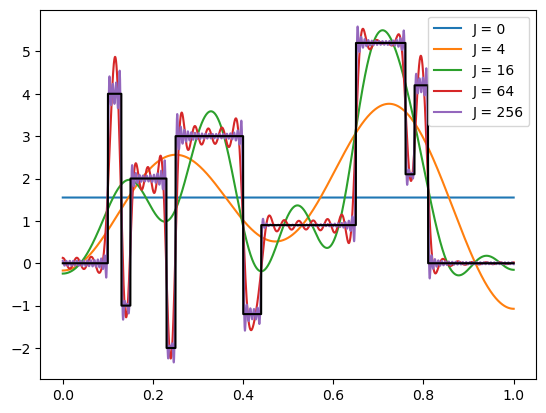

In [170]:
i = 0
plt.plot(xs, cJs[:,i], label = "J = " + str(i))
i += 1

while 4 ** i <= J:
    plt.plot(xs, cJs[:, 4**i], label = "J = " + str(4 ** i))
    i += 1

plt.plot(xs, cs, color='k')

plt.legend()
plt.show()

In [167]:
def d(x):
    return np.sqrt(x * (1 - x)) * np.sin(2.1 * x / (x + 0.05))

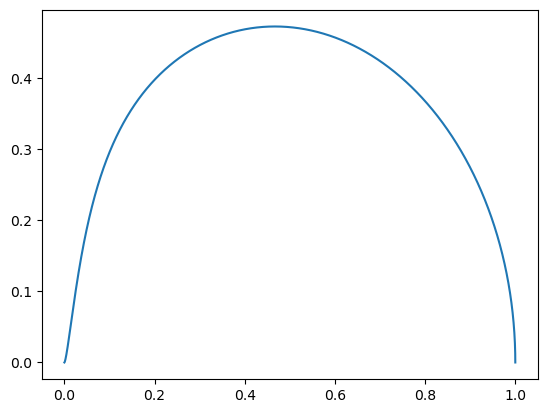

In [144]:
ds = d(xs)

plt.plot(xs, ds)
plt.show()

In [171]:
J = 64

betadict_d = {}

betadict_d[0] = np.ones(xs.shape) @ ds * dx

for i in range(1, J+1):
    betadict_d[i] = np.sqrt(2) * np.cos(i * np.pi * xs) @ ds * dx

In [172]:
termarrays = np.array(list(betadict_d.values())).reshape(1, -1) * np.sqrt(2) * np.cos(np.array(list(betadict_d)).reshape(1, -1) * np.pi * xs.reshape(-1, 1))
termarrays[:, 0] = np.array(betadict_d[0])
dJs = np.cumsum(termarrays, axis = 1)
dJs.shape

(10000, 65)

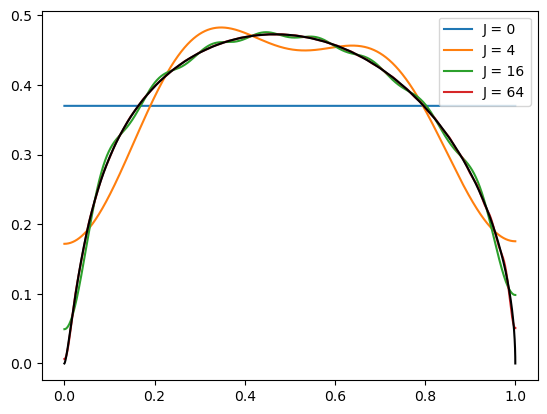

In [173]:
i = 0
plt.plot(xs, dJs[:,i], label = "J = " + str(i))
i += 1

while 4 ** i <= J:
    plt.plot(xs, dJs[:, 4**i], label = "J = " + str(4 ** i))
    i += 1

plt.plot(xs, ds, color='k')

plt.legend()
plt.show()

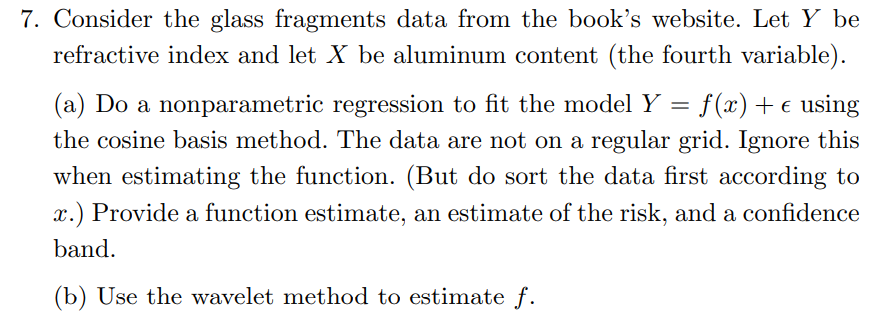

In [1]:
import pandas as pd

In [19]:
glass_data = pd.read_csv('glass.txt', sep='\t')

In [20]:
Y = glass_data.RI
X = glass_data.Al

In [ ]:
betadict = 
for i in range(0, 1000):